In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Đọc và chia dữ liệu thành X, y


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(1025, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = data.drop("target", axis=1)
y = data["target"]

In [6]:
y = y.values.reshape(-1, 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=10
)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((922, 13), (103, 13), (922, 1), (103, 1))

### Chuẩn hoá lại giá trị, tránh gây tràn số và để đồng nhất khoảng giá trị của features


In [9]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()

In [10]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])  # Fit & transform train
X_test_scaled[num_features] = scaler.transform(X_test[num_features])  # Chỉ transform test

In [11]:
X_train_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
896,0.494174,1,3,2.644847,0.458429,0,0,-0.157381,0,2.628194,0,0,3
900,0.714710,1,3,0.129229,-0.235075,0,1,-0.157381,0,1.279727,1,2,2
983,1.045514,1,0,-0.213810,0.323581,0,1,-1.885339,1,-0.742973,1,1,3
728,-0.939312,1,0,0.472267,1.248254,0,1,-1.237355,1,0.605494,1,2,3
358,0.494174,1,3,0.129229,-0.812996,0,1,0.577001,0,-0.237298,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-1.600921,1,3,0.472267,-0.909316,0,1,1.268184,1,0.268377,2,0,3
123,1.155783,0,2,0.472267,3.290239,1,0,0.361006,0,-0.237298,2,1,2
369,-0.387972,1,2,-1.242927,-1.371652,0,1,-1.107758,0,-0.405856,2,0,2
320,-0.167435,0,0,-0.099464,0.342845,0,0,-0.243779,0,-0.574415,1,0,2


In [12]:
X_test_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
620,0.273637,1,0,1.158345,0.535485,0,1,-2.619721,1,0.099819,1,1,3
181,1.045514,1,3,-1.242927,-0.678148,0,0,-0.200580,1,0.605494,1,0,2
546,1.707123,1,0,-0.099464,1.460158,0,0,-1.712543,0,1.111169,1,3,2
618,-0.608508,1,1,-0.099464,0.381373,0,1,0.965792,0,-0.405856,2,0,2
822,0.604442,1,0,-0.099464,0.130941,0,1,-0.200580,1,0.268377,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.053101,0,1,0.186402,0.073149,0,0,0.533802,0,0.268377,1,0,2
971,-0.277704,1,2,2.301808,-0.909316,1,1,0.577001,0,-0.490136,2,0,3
284,0.383905,1,2,0.014882,-0.427715,0,0,1.052190,0,1.785402,2,2,3
1022,-0.829044,1,0,-1.242927,0.554749,0,0,-1.323753,1,-0.068740,1,1,2


In [13]:
X_train = X_train_scaled.values
X_test = X_test_scaled.values

In [14]:
X_train

array([[ 0.49417357,  1.        ,  3.        , ...,  0.        ,
         0.        ,  3.        ],
       [ 0.71470989,  1.        ,  3.        , ...,  1.        ,
         2.        ,  2.        ],
       [ 1.04551437,  1.        ,  0.        , ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [-0.3879717 ,  1.        ,  2.        , ...,  2.        ,
         0.        ,  2.        ],
       [-0.16743538,  0.        ,  0.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.82497805,  0.        ,  0.        , ...,  2.        ,
         0.        ,  2.        ]], shape=(922, 13))

In [15]:
X_test

array([[ 0.27363725,  1.        ,  0.        , ...,  1.        ,
         1.        ,  3.        ],
       [ 1.04551437,  1.        ,  3.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 1.70712333,  1.        ,  0.        , ...,  1.        ,
         3.        ,  2.        ],
       ...,
       [ 0.38390541,  1.        ,  2.        , ...,  2.        ,
         2.        ,  3.        ],
       [-0.82904434,  1.        ,  0.        , ...,  1.        ,
         1.        ,  2.        ],
       [ 1.81739149,  0.        ,  0.        , ...,  1.        ,
         0.        ,  2.        ]], shape=(103, 13))

### Xây dựng hàm sigmoid


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Xây dựng hàm dự đoán


In [17]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

### Xây dựng hàm phân lớp


In [18]:
def classify(predictions):
    classes = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    return classes

### Xây dựng hàm mất mát


In [19]:
def cost_function(features, weights, labels):
    num_samples = len(labels)
    predictions = predict(features, weights)  # y_hat, còn labels là y
    cost_class1 = -labels * np.log(predictions)
    cost_class2 = -(1 - labels) * np.log(1 - predictions)
    cost = cost_class1 + cost_class2
    cost = cost.sum() / num_samples

    return cost

### Cập nhật trọng số


In [20]:
def update_weights(features, weights, labels, learning_rate):
    num_samples = len(labels)
    y_predictions = predict(features, weights)
    gradient = np.dot(features.T, y_predictions - labels) / num_samples
    weights -= learning_rate * gradient
    return weights

### Xây dựng mô hình


In [21]:
def train(
    X_train_bar, labels_train, X_test_bar, labels_test, num_epochs, learning_rate, is_print=False
):
    d = X_train_bar.shape[1]
    weights = np.random.randn(d, 1) * 0.01

    train_losses = []
    test_losses = []
    best_weights = weights
    min_loss = float("inf")
    best_epoch = 0

    for epoch in range(num_epochs):
        weights = update_weights(X_train_bar, weights, labels_train, learning_rate)

        # Tính loss trên tập train
        train_loss = cost_function(X_train_bar, weights, labels_train)
        train_losses.append(train_loss)

        # Tính loss trên tập test
        test_loss = cost_function(X_test_bar, weights, labels_test)
        test_losses.append(test_loss)

        if epoch % 100 == 0 and is_print:
            print(f"Epoch {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}")

        if train_loss < min_loss:
            min_loss = train_loss
            best_weights = weights.copy()
            best_epoch = epoch

    return best_epoch, best_weights, train_losses, test_losses

In [22]:
num_epochs = 20000
learning_rate = 0.01
X_train_bar = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bar = np.c_[np.ones((X_test.shape[0], 1)), X_test]

best_epoch, best_weights, train_losses, test_losses = train(
    X_train_bar, y_train, X_test_bar, y_test,num_epochs, learning_rate, is_print=True
)

Epoch 0, Train Loss: 0.6944837183212498, Test Loss: 0.6945783479122762
Epoch 100, Train Loss: 0.5438033868762722, Test Loss: 0.549327741819663
Epoch 200, Train Loss: 0.48189189844050184, Test Loss: 0.49056647508743845
Epoch 300, Train Loss: 0.45023958671959524, Test Loss: 0.46106128792755124
Epoch 400, Train Loss: 0.43140444624569196, Test Loss: 0.44374705307242635
Epoch 500, Train Loss: 0.41899965897011643, Test Loss: 0.43242285984543305
Epoch 600, Train Loss: 0.41022811844059887, Test Loss: 0.4244085227675685
Epoch 700, Train Loss: 0.40369351838188344, Test Loss: 0.4183881252595548
Epoch 800, Train Loss: 0.39862805706178345, Test Loss: 0.413651678281583
Epoch 900, Train Loss: 0.3945772116951547, Test Loss: 0.40978743464849665
Epoch 1000, Train Loss: 0.391255829554791, Test Loss: 0.40654253836640275
Epoch 1100, Train Loss: 0.388476421323167, Test Loss: 0.40375426143776344
Epoch 1200, Train Loss: 0.3861108422449697, Test Loss: 0.4013136719541063
Epoch 1300, Train Loss: 0.38406861102894

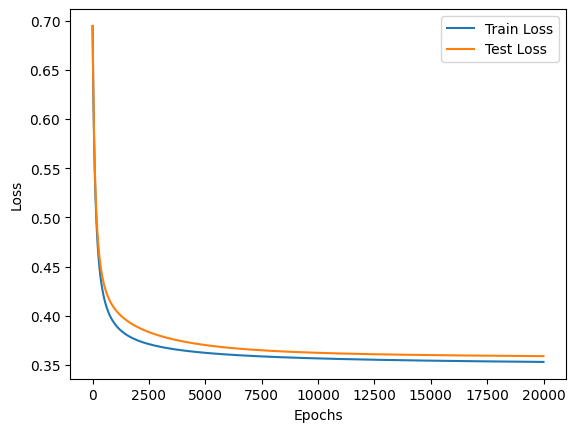

In [23]:
# Vẽ đồ thị biểu diễn cost
import matplotlib.pyplot as plt

epochs = range(num_epochs)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Thay đổi số epoch (Early Stopping)


In [24]:
num_epochs = 10000
best_epoch, best_weights, train_losses, test_losses = train(X_train_bar, y_train, X_test_bar, y_test,num_epochs, learning_rate)

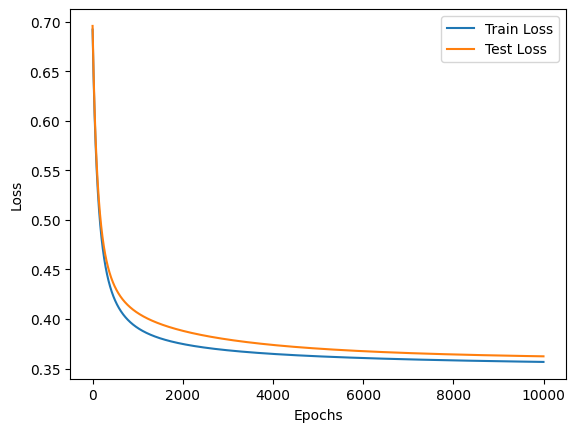

In [25]:
# Vẽ đồ thị biểu diễn cost
import matplotlib.pyplot as plt

epochs = range(num_epochs)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Tính toán độ chính xác


In [26]:
# Tính accuracy trên train
y_train_pred = predict(X_train_bar, best_weights)
y_train_pred = classify(y_train_pred)
n_train = X_train_bar.shape[0]

n = X_train_bar.shape[0]
correct_records = 0
for i in range(n):
    if y_train[i] == y_train[i]:
        correct_records += 1

accuracy = correct_records / n
best_epoch, accuracy

(9999, 1.0)

In [27]:
# Tính accuracy trên test
y_test_pred = predict(X_test_bar, best_weights)
y_test_pred = classify(y_test_pred)
n_test = X_test_bar.shape[0]

n = X_test_bar.shape[0]
correct_records = 0
for i in range(n):
    if y_test_pred[i] == y_test[i]:
        correct_records += 1

accuracy = correct_records / n
accuracy

0.8737864077669902